<a href="https://colab.research.google.com/github/kkakshay19/Cats_and-dog-DL/blob/main/Cat%26Dog_clsfn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sunilthite/cat-or-dog-image-classification")

print("Path to dataset files:", path)

100%|██████████| 599M/599M [00:04<00:00, 128MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test"
test_dir = "/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train"

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 3863 images belonging to 2 classes.
Found 23650 images belonging to 2 classes.


In [ ]:
train_datagen

In [ ]:
# prompt: how to view train_datagen and test_datagen

print("Train datagen config:")
print(train_datagen.__dict__)

print("\nTest datagen config:")
test_datagen.__dict__


Train datagen config:
{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 0, 'width_shift_range': 0.0, 'height_shift_range': 0.0, 'shear_range': 0.0, 'zoom_range': [1.0, 1.0], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': 0.00392156862745098, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}

Test datagen config:


{'featurewise_center': False,
 'samplewise_center': False,
 'featurewise_std_normalization': False,
 'samplewise_std_normalization': False,
 'zca_whitening': False,
 'zca_epsilon': 1e-06,
 'rotation_range': 0,
 'width_shift_range': 0.0,
 'height_shift_range': 0.0,
 'shear_range': 0.0,
 'zoom_range': [1.0, 1.0],
 'channel_shift_range': 0.0,
 'fill_mode': 'nearest',
 'cval': 0.0,
 'horizontal_flip': False,
 'vertical_flip': False,
 'rescale': 0.00392156862745098,
 'preprocessing_function': None,
 'dtype': 'float32',
 'interpolation_order': 1,
 'data_format': 'channels_last',
 'channel_axis': 3,
 'row_axis': 1,
 'col_axis': 2,
 '_validation_split': 0.0,
 'mean': None,
 'std': None,
 'zca_whitening_matrix': None,
 'brightness_range': None}

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 519s 4s/step - accuracy: 0.5150 - loss: 0.9390 - val_accuracy: 0.6247 - val_loss: 0.6587
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 523s 4s/step - accuracy: 0.6413 - loss: 0.6422 - val_accuracy: 0.6572 - val_loss: 0.6192
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 550s 4s/step - accuracy: 0.7051 - loss: 0.5785 - val_accuracy: 0.7137 - val_loss: 0.5628
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 508s 4s/step - accuracy: 0.7605 - loss: 0.5124 - val_accuracy: 0.7061 - val_loss: 0.5713
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 508s 4s/step - accuracy: 0.7875 - loss: 0.4472 - val_accuracy: 0.7086 - val_loss: 0.5827
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.8483 - loss: 0.3532 - val_accuracy: 0.7619 - val_loss: 0.5708
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.9015 - loss: 0.2440 - val_accuracy: 0.7391 - val_loss: 0.7102
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.9324 - loss: 0.1680 - val_accu

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



740/740 ━━━━━━━━━━━━━━━━━━━━ 316s 427ms/step - accuracy: 0.7522 - loss: 1.2656
Test Accuracy: 75.45%


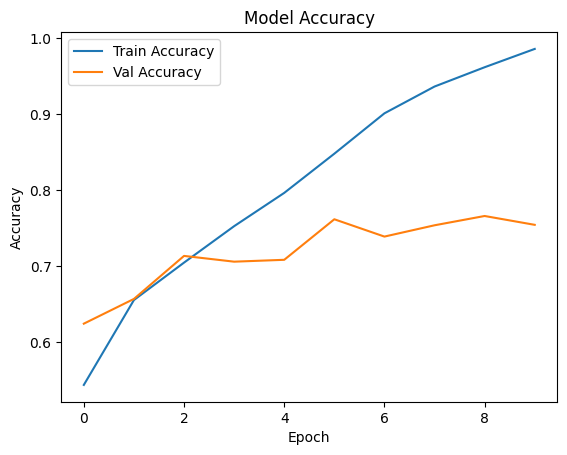

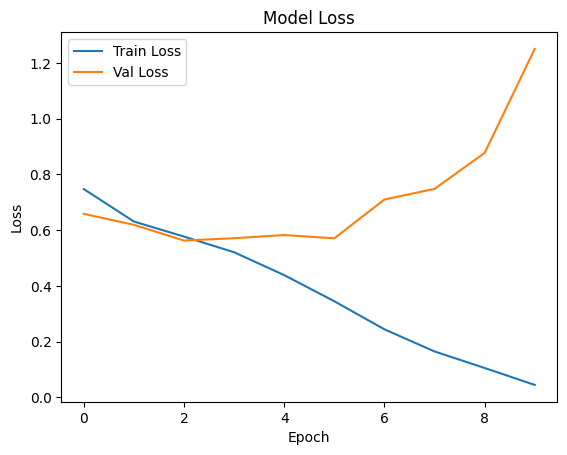

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving download (1).jpg to download (1).jpg


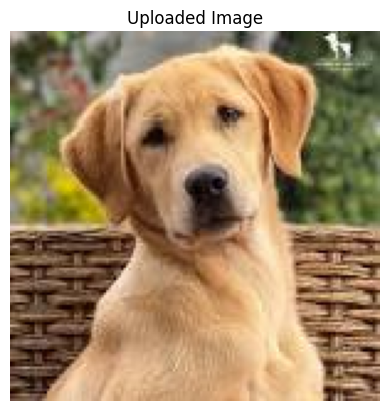

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded file name
import os
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = image.load_img(image_path, target_size=(150, 150))  # Same size as training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Model expects 4D input

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [ ]:
# Make prediction
prediction = model.predict(img_array)

# Interpret result
if prediction[0][0] > 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")

print(f"Confidence: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Dog 🐶
Confidence: 1.0000
